<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>

For instructions on how to run an interactive iPython notebook, click here: https://github.com/landlab/tutorials/blob/master/README.md
For the unexpanded version to download and run, click here:http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/component_tutorial/component_tutorial_unexpanded.ipynb
For more Landlab tutorials, click here: https://github.com/landlab/landlab/wiki/Tutorials

**Application of the stream_length utility on a Sicilian basin**

This notebook illustrates how to run the stream_length utility on a digital elevation model (DEM) that represents a real basin in Sicily. First, a watershed will be extracted from the input DEM by using the watershed utility. Then, the distances from each node to the watershed's outlet will be obtained with the stream_length utility. Flow is routed using the D8 algorithm.

First, import what we'll need:

In [1]:
from landlab.io import read_esri_ascii
from landlab.components import FlowAccumulator
from landlab.plot import imshow_grid
from matplotlib.pyplot import figure
%matplotlib inline
from landlab.utils import watershed
import numpy as np
from landlab.utils.stream_length import calculate_stream_length

Import a square DEM that includes the watershed:

In [2]:
(mg, z) = read_esri_ascii('nocella_resampled.txt', 
                          name='topographic__elevation')

Run the FlowAccumulator and the DepressionFinderAndRouter components to find depressions, to route the flow across them and to calculate flow direction and drainage area:

In [3]:
fr = FlowAccumulator(mg, flow_director='D8', 
                     depression_finder='DepressionFinderAndRouter')
fr.run_one_step()

Set the id of the outlet. The value indicated here is the node id of the entire watershed's outlet:

In [4]:
outlet_id = 15324

Run the watershed utility and show the watershed mask:

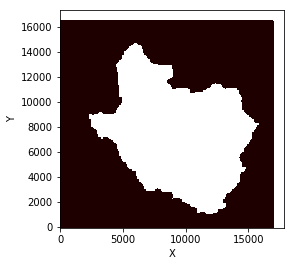

In [5]:
ws_mask = watershed.get_watershed_mask(mg, outlet_id)
figure(); imshow_grid(mg, ws_mask, allow_colorbar=False)

Run the stream_length utility:

In [6]:
stream__length = calculate_stream_length(mg, add_to_grid=True, 
                                         noclobber=False)

Mask the stream__length to the watershed mask. This operation has to be done because the stream_length utility is applied to the entire grid that contains other streams not connected with our stream network and, for this reason, not belonging to our watershed.

In [7]:
flow_length = np.zeros(mg.number_of_nodes)
flow_length[ws_mask] = stream__length[ws_mask] - stream__length[outlet_id]

Add the flow_length field to the grid and show the spatial distribution of the distances from each node to the watershed's outlet:

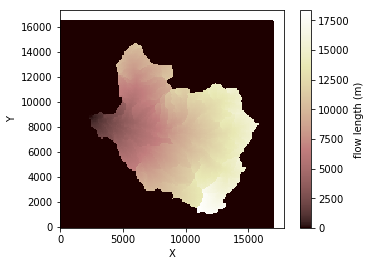

In [8]:
mg.add_field('node', 'flow_length', flow_length, noclobber=False)
figure(); imshow_grid(mg, mg.at_node['flow_length'], colorbar_label='flow length (m)')